In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt




In [15]:
df = pd.read_csv ('/content/WELFake_Dataset.csv')


In [16]:
df.dropna(subset=['text'], inplace=True)

In [17]:
X = df['text']  
y = df['label']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)


In [20]:
tfidf_train = tfidf_vectorizer.fit_transform(X_train.astype('U'))
tfidf_test = tfidf_vectorizer.transform(X_test.astype('U'))


In [21]:
nb_model = MultinomialNB()
nb_model.fit(tfidf_train, y_train)
nb_pred = nb_model.predict(tfidf_test)
nb_report = classification_report(y_test, nb_pred, output_dict=True)

In [22]:
lr_model = LogisticRegression(max_iter=5000)
lr_model.fit(tfidf_train, y_train)
lr_pred = lr_model.predict(tfidf_test)
lr_report = classification_report(y_test, lr_pred, output_dict=True)


In [23]:
dt_model = DecisionTreeClassifier()
dt_model.fit(tfidf_train, y_train)
dt_pred = dt_model.predict(tfidf_test)
dt_report = classification_report(y_test, dt_pred, output_dict=True)

In [25]:
precision = [nb_report['weighted avg']['precision'], lr_report['weighted avg']['precision'], dt_report['weighted avg']['precision']]
recall = [nb_report['weighted avg']['recall'], lr_report['weighted avg']['recall'], dt_report['weighted avg']['recall']]
f1_score = [nb_report['weighted avg']['f1-score'], lr_report['weighted avg']['f1-score'], dt_report['weighted avg']['f1-score']]
accuracy = [accuracy_score(y_test, nb_pred), accuracy_score(y_test, lr_pred), accuracy_score(y_test, dt_pred)]



In [26]:
labels = ['Multinomial NB', 'Logistic Regression', 'Decision Tree']


In [27]:
bar_positions = np.arange(len(labels))
bar_width = 0.2

In [32]:
print("Multinomial Naive Bayes Report:")
print(nb_report)
print("Logistic Regression Report:")
print(lr_report)
print("Decision Tree Report:")
print(dt_report)

Multinomial Naive Bayes Report:
{'0.0': {'precision': 0.8520555119141137, 'recall': 0.8658861096327833, 'f1-score': 0.8589151379173815, 'support': 3758}, '1.0': {'precision': 0.8684759916492694, 'recall': 0.8548677112766504, 'f1-score': 0.8616181229773463, 'support': 3893}, 'accuracy': 0.8602797019997386, 'macro avg': {'precision': 0.8602657517816915, 'recall': 0.8603769104547169, 'f1-score': 0.8602666304473638, 'support': 7651}, 'weighted avg': {'precision': 0.8604106194306423, 'recall': 0.8602797019997386, 'f1-score': 0.8602904771983177, 'support': 7651}}
Logistic Regression Report:
{'0.0': {'precision': 0.9374145941514075, 'recall': 0.9127195316657797, 'f1-score': 0.9249022515841986, 'support': 3758}, '1.0': {'precision': 0.9178356713426854, 'recall': 0.9411764705882353, 'f1-score': 0.9293595434369055, 'support': 3893}, 'accuracy': 0.927199058946543, 'macro avg': {'precision': 0.9276251327470464, 'recall': 0.9269480011270075, 'f1-score': 0.9271308975105521, 'support': 7651}, 'weight

Text(0.5, 1.0, 'Comparison of Metrics ')

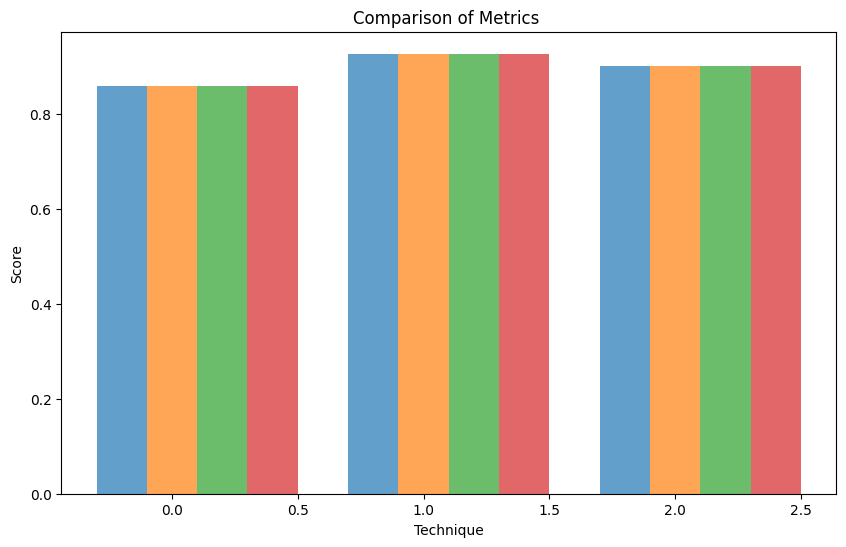

In [33]:
plt.figure(figsize=(10, 6))
plt.bar(bar_positions - bar_width, precision, width=bar_width, label='Precision', alpha=0.7)
plt.bar(bar_positions, recall, width=bar_width, label='Recall', alpha=0.7)
plt.bar(bar_positions + bar_width, f1_score, width=bar_width, label='F1-Score', alpha=0.7)
plt.bar(bar_positions + (2 * bar_width), accuracy, width=bar_width, label='Accuracy', alpha=0.7)
plt.xlabel('Technique')
plt.ylabel('Score')
plt.title('Comparison of Metrics ')